In [1]:
from collections import defaultdict

SEED = 1337

In [2]:
import csv

with open('../data/atis/train.tsv', 'rt') as f:
    reader = csv.reader(f, delimiter='\t')
    data = list(reader)
print(data[:5])

[['i want to fly from boston at 838 am and arrive in denver at 1110 in the morning', 'flight'], ['what flights are available from pittsburgh to baltimore on thursday morning', 'flight'], ['what is the arrival time in san francisco for the 755 am flight leaving washington', 'flight_time'], ['cheapest airfare from tacoma to orlando', 'airfare'], ['round trip fares from pittsburgh to philadelphia under 1000 dollars', 'airfare']]


In [3]:
data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

In [7]:
from sklearn.model_selection import train_test_split

data_x_train, data_x_val, data_y_train, data_y_val = train_test_split(data_x, data_y, test_size=0.2, random_state=SEED)

len(data_x_train), len(data_x_val)

(3707, 927)

In [8]:
labels = set(data_y_train)
set(labels)

{'abbreviation',
 'aircraft',
 'airfare',
 'airfare+flight_time',
 'airline',
 'airline+flight_no',
 'airport',
 'capacity',
 'cheapest',
 'city',
 'distance',
 'flight',
 'flight+airfare',
 'flight_no',
 'flight_time',
 'ground_fare',
 'ground_service',
 'meal',
 'quantity',
 'restriction'}

In [10]:
base_labels = {b for l in labels for b in l.split('+')}
len(base_labels), base_labels

(17,
 {'abbreviation',
  'aircraft',
  'airfare',
  'airline',
  'airport',
  'capacity',
  'cheapest',
  'city',
  'distance',
  'flight',
  'flight_no',
  'flight_time',
  'ground_fare',
  'ground_service',
  'meal',
  'quantity',
  'restriction'})

In [13]:
from collections import defaultdict
by_label = defaultdict(list)
for x, y in zip(data_x_train, data_y_train):
    by_label[y].append(x)
{l: len(xs) for l, xs in by_label.items()}

{'ground_service': 185,
 'flight': 2755,
 'airfare': 319,
 'flight_time': 44,
 'abbreviation': 93,
 'aircraft': 58,
 'airline': 118,
 'quantity': 37,
 'cheapest': 1,
 'distance': 13,
 'airline+flight_no': 1,
 'city': 15,
 'capacity': 11,
 'airport': 13,
 'flight_no': 9,
 'ground_fare': 14,
 'flight+airfare': 14,
 'restriction': 4,
 'airfare+flight_time': 1,
 'meal': 2}

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=SEED, max_features=10)

In [16]:
from sklearn import metrics

def val_accuracy(f):
    print(metrics.accuracy_score(data_y_val, f(data_x_val)))

val_accuracy(lambda xs: ["flight" for _ in xs])

0.7238403451995685


In [17]:
def simple_model(x):
    if "fare" in x:
        return "airfare"
    if "ground" in x:
        return "ground_service"
    return "flight"

val_accuracy(lambda xs: [simple_model(x) for x in xs])

0.8220064724919094


In [30]:
data_x_words = sorted({w for x in data_x_train for w in x.split(' ')})
len(data_x_words)

845

In [31]:
def one_hot_features(x):
    """Feature at index i equals 1 iff the word i is in the string x"""
    xw = x.split(' ')
    return [int(w in xw) for w in data_x_words]

data_x_features = [one_hot_features(x) for x in data_x_train]

In [32]:
print(*data_x_features[0])

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [33]:
classifier.fit(data_x_features, data_y_train)

DecisionTreeClassifier(max_depth=5, max_features=10, random_state=1337)

In [34]:
def tree_classifier_model(xs: list) -> list:
    features = [one_hot_features(x) for x in xs]
    return classifier.predict(features)

val_accuracy(tree_classifier_model)

0.7400215749730313


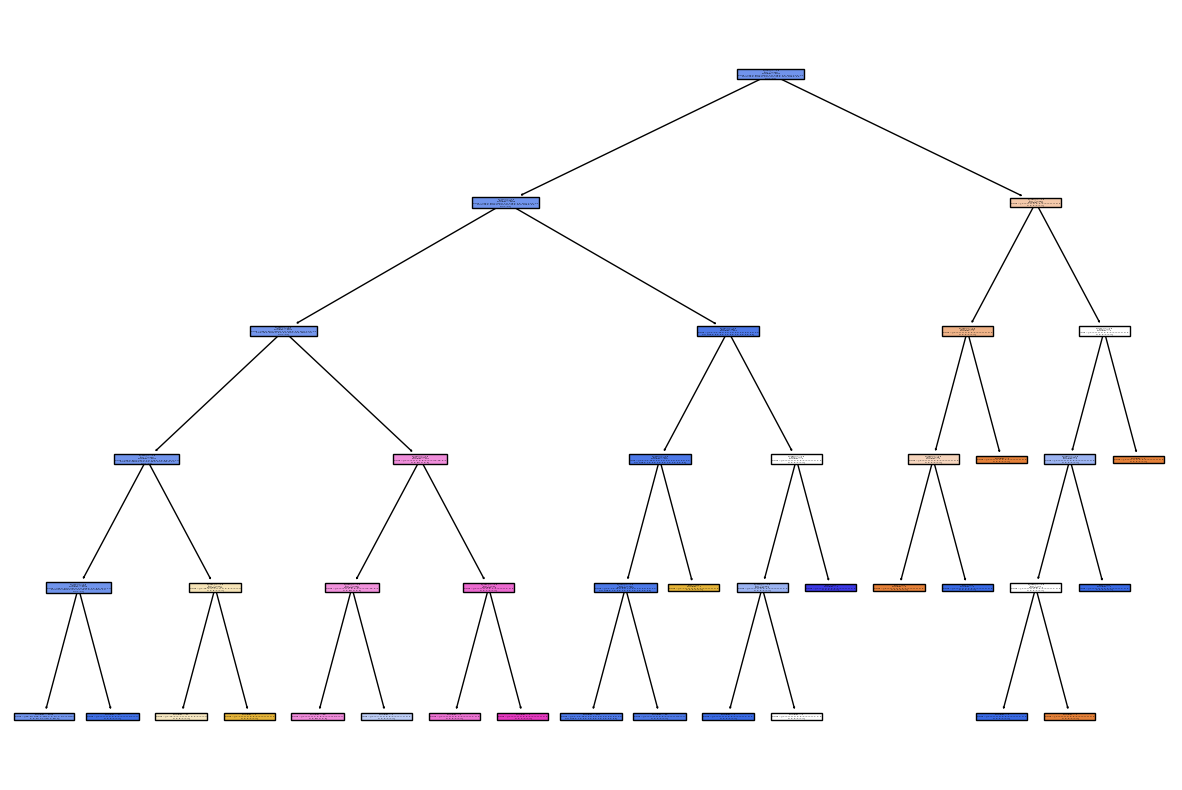

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))  # adjust the size of the figure
plot_tree(classifier, filled=True)
plt.show()


In [36]:
tree_classifier_model(["how much does the ticket from Orlando to SF cost?", "how large is 737"])

array(['flight', 'flight'], dtype='<U19')

In [37]:
words = [(data_x_words[ix], val) for ix, val in enumerate(classifier.feature_importances_) if val]

In [38]:
words

[('airport', 0.5478756425271468),
 ('all', 0.11498396453010234),
 ('and', 0.0017713905367025544),
 ('are', 0.0006314679228060013),
 ('between', 0.0020479016648536617),
 ('codes', 0.007577615073672042),
 ('delta', 0.0025258716912240136),
 ('denver', 0.0029020884820821356),
 ('flights', 0.018186276176812902),
 ('give', 0.005051743382448029),
 ('goes', 0.0023946575773941808),
 ('kind', 0.16702590196616174),
 ('know', 0.013758494761741494),
 ('list', 0.0025258716912240136),
 ('meaning', 0.005051743382448029),
 ('oakland', 0.01834501672973967),
 ('qx', 0.04424195821982203),
 ('sunday', 0.027617798378924384),
 ('the', 0.003464052605107221),
 ('their', 0.012020542699586731)]

In [48]:
classifier2 = DecisionTreeClassifier(random_state=SEED)
classifier2.fit(data_x_features, data_y_train)

def adapt_classifier(cls):
    return lambda xs: cls.predict([one_hot_features(x) for x in xs])

tree_classifier_model2 = adapt_classifier(classifier2)
val_accuracy(tree_classifier_model2)

0.9169363538295577


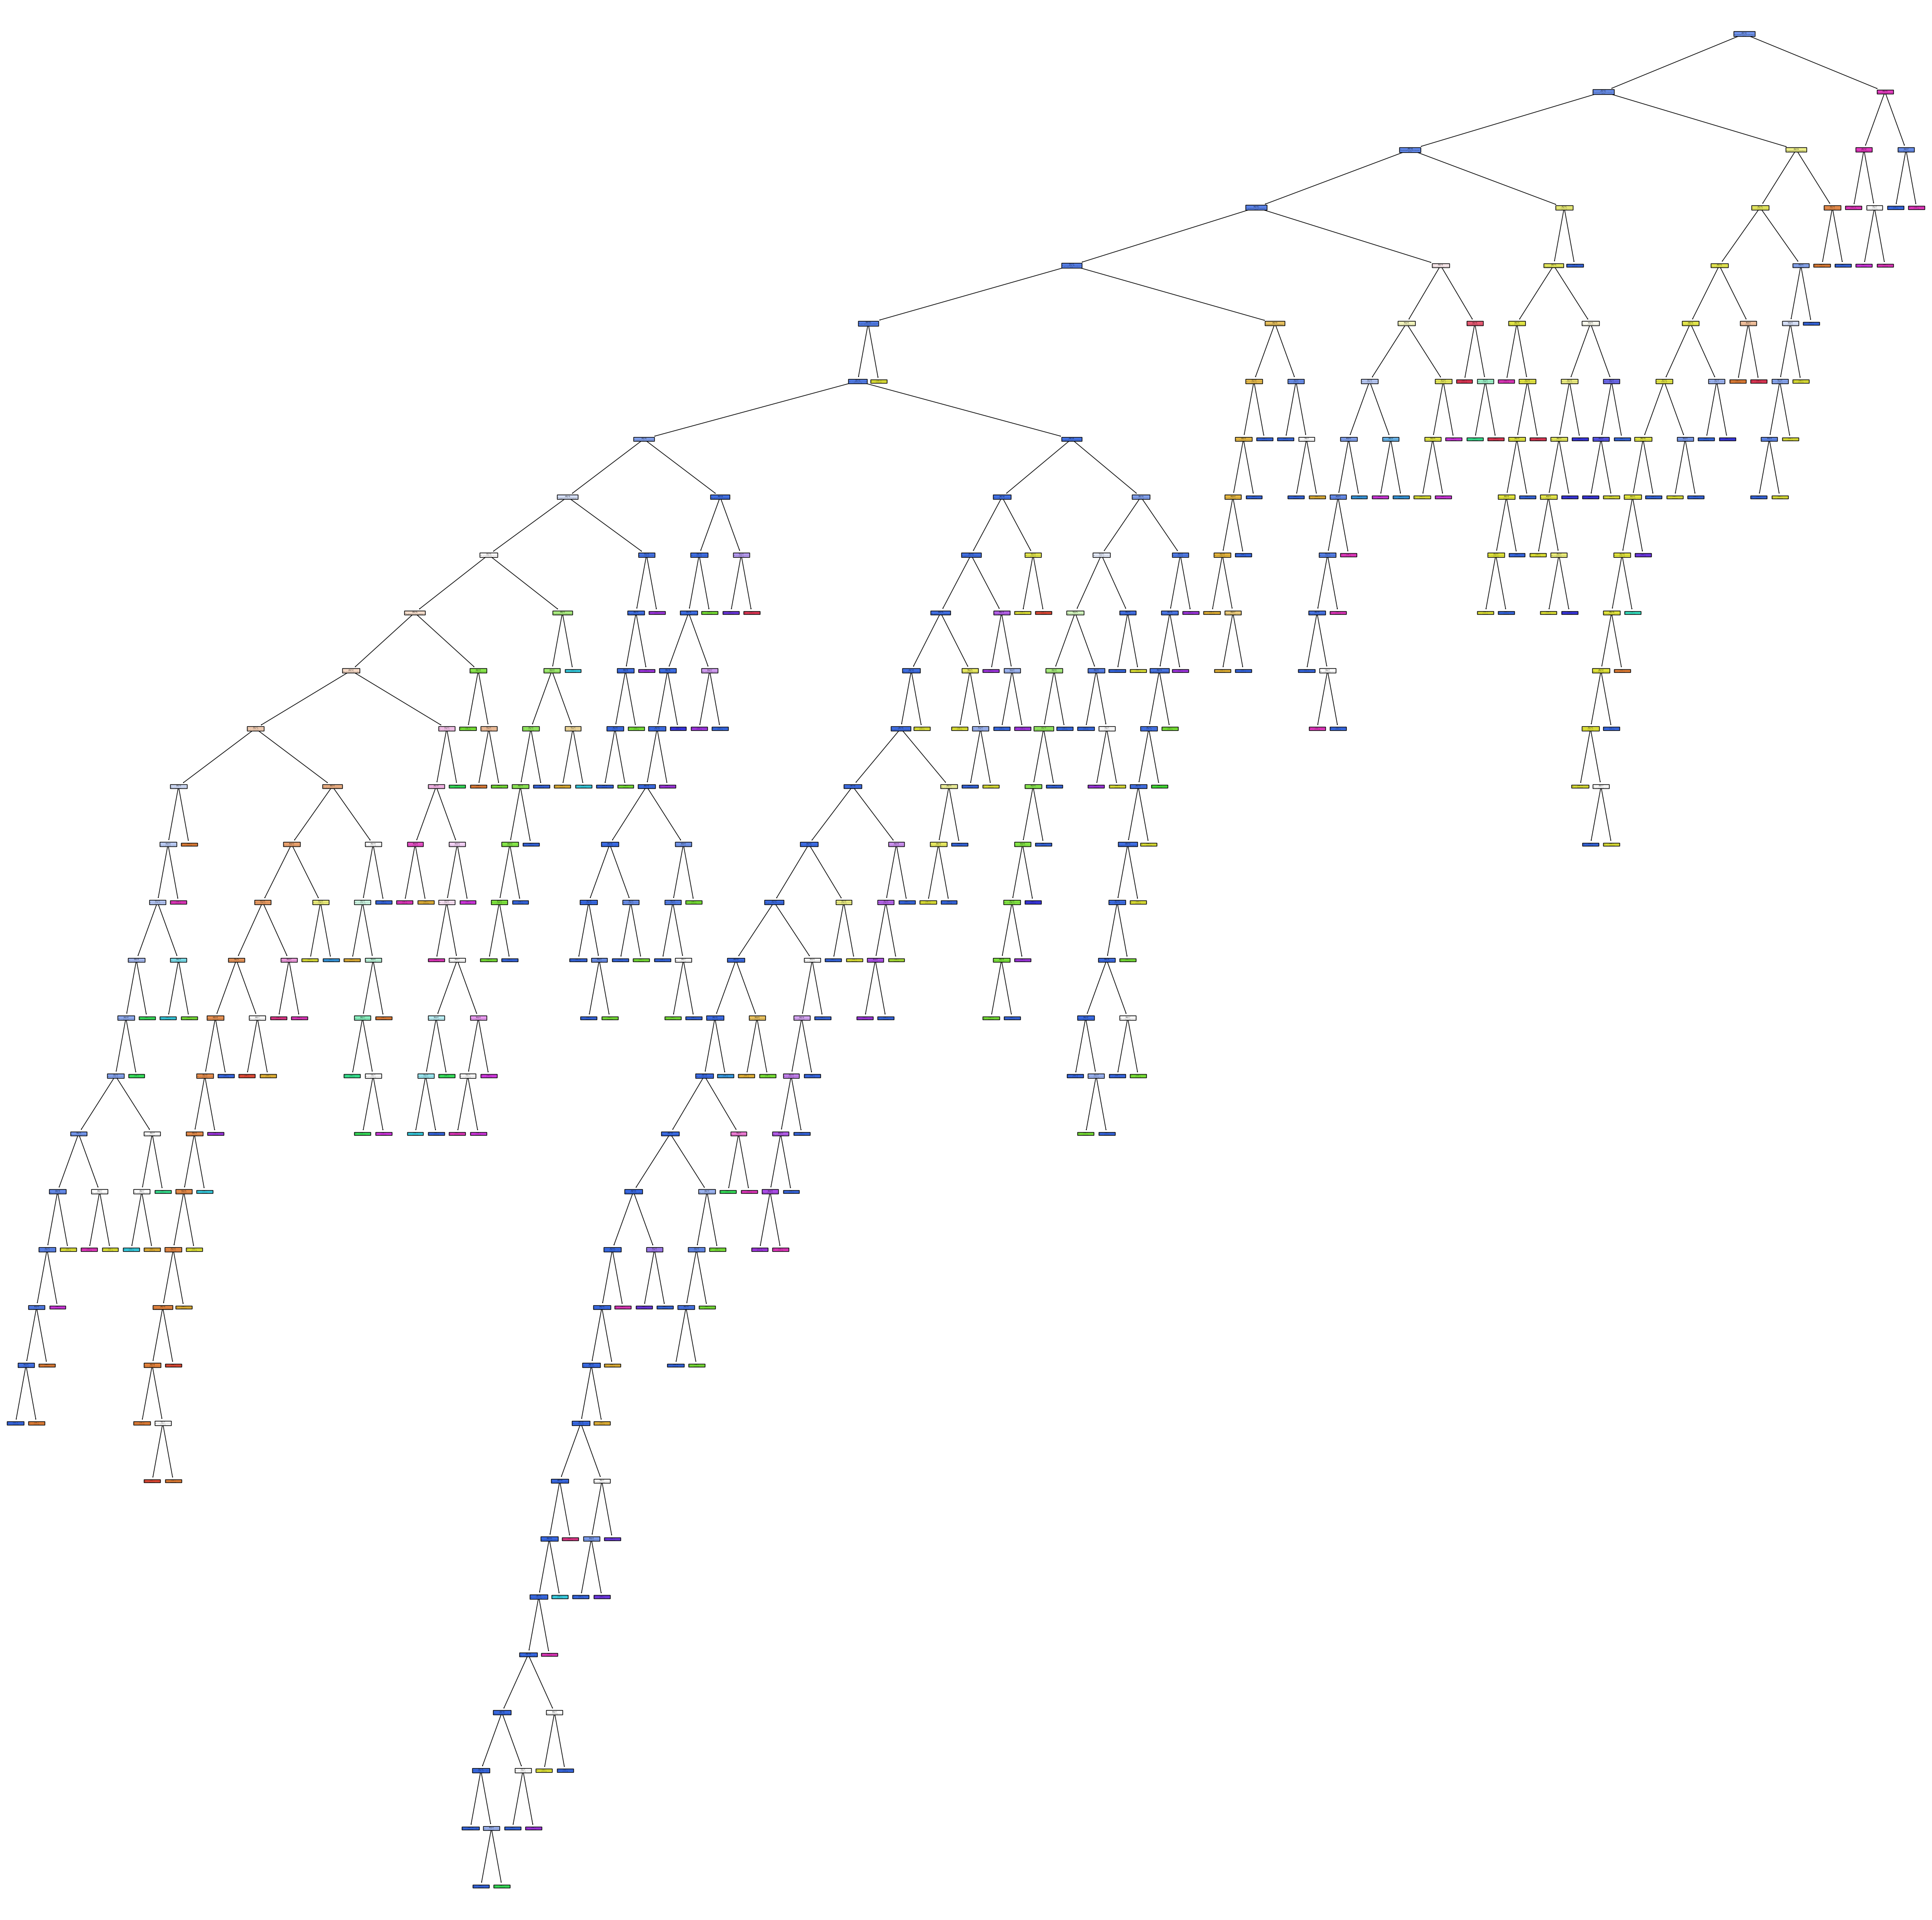

In [56]:
fig, ax = plt.subplots(figsize=(50, 50))  # adjust the size of the figure
plot_tree(classifier2, filled=True)
plt.show()

In [58]:
sorted([(val, data_x_words[ix]) for ix, val in enumerate(classifier2.feature_importances_) if val], reverse=True)

[(0.14382491669283456, 'ground'),
 (0.09428615665316045, 'fare'),
 (0.06765786775898713, 'fares'),
 (0.050355366946127626, 'flights'),
 (0.04301971325820525, 'how'),
 (0.035542121673295186, 'aircraft'),
 (0.029965243077372597, 'flight'),
 (0.029768853127219136, 'ticket'),
 (0.029416611428426033, 'to'),
 (0.028918890585112964, 'code'),
 (0.022672933363729532, 'airlines'),
 (0.01616326648131455, 'many'),
 (0.0160239192578279, 'with'),
 (0.015957001499288852, 'airline'),
 (0.012886047287152948, 'time'),
 (0.012177894027575761, 'times'),
 (0.012043506232736692, 'schedule'),
 (0.011666588724275445, 'airfare'),
 (0.010117192761072341, 'much'),
 (0.010084870041858403, 'what'),
 (0.009794512049826235, 'on'),
 (0.009654295890910226, 'prices'),
 (0.009448883645077634, 'tickets'),
 (0.009438017718123713, 'united'),
 (0.009198459999541391, 'cost'),
 (0.008183885151247097, 'in'),
 (0.007788961590482543, 'american'),
 (0.007405496744465747, 'and'),
 (0.007320798388871181, 'of'),
 (0.0069396199174423

In [70]:
classifier3 = DecisionTreeClassifier(random_state=SEED, max_depth=7, min_samples_split=20, min_samples_leaf=5)
classifier3.fit(data_x_features, data_y_train)
tree_classifier_model3 = adapt_classifier(classifier3)
val_accuracy(tree_classifier_model3)

0.866235167206041


In [71]:
from sklearn.tree import export_text
print(export_text(classifier3, feature_names=data_x_words))

|--- ground <= 0.50
|   |--- fare <= 0.50
|   |   |--- fares <= 0.50
|   |   |   |--- how <= 0.50
|   |   |   |   |--- aircraft <= 0.50
|   |   |   |   |   |--- ticket <= 0.50
|   |   |   |   |   |   |--- to <= 0.50
|   |   |   |   |   |   |   |--- class: flight
|   |   |   |   |   |   |--- to >  0.50
|   |   |   |   |   |   |   |--- class: flight
|   |   |   |   |   |--- ticket >  0.50
|   |   |   |   |   |   |--- class: airfare
|   |   |   |   |--- aircraft >  0.50
|   |   |   |   |   |--- at <= 0.50
|   |   |   |   |   |   |--- am <= 0.50
|   |   |   |   |   |   |   |--- class: aircraft
|   |   |   |   |   |   |--- am >  0.50
|   |   |   |   |   |   |   |--- class: aircraft
|   |   |   |   |   |--- at >  0.50
|   |   |   |   |   |   |--- class: flight
|   |   |   |--- how >  0.50
|   |   |   |   |--- many <= 0.50
|   |   |   |   |   |--- much <= 0.50
|   |   |   |   |   |   |--- is <= 0.50
|   |   |   |   |   |   |   |--- class: flight
|   |   |   |   |   |   |--- is >  0.50
|   |  

In [72]:
sorted([(val, data_x_words[ix]) for ix, val in enumerate(classifier3.feature_importances_) if val], reverse=True)

[(0.26734221170599237, 'ground'),
 (0.1752594072885661, 'fare'),
 (0.12422768761031726, 'fares'),
 (0.07777734645050625, 'how'),
 (0.06606580859111745, 'aircraft'),
 (0.05533443869102624, 'ticket'),
 (0.05251810073452403, 'to'),
 (0.04698259141520642, 'code'),
 (0.028509359291083298, 'many'),
 (0.024608297356677217, 'with'),
 (0.017669306540731247, 'much'),
 (0.011285565132819534, 'flights'),
 (0.008500316376423962, 'and'),
 (0.0071376186514739825, 'a'),
 (0.0070840630198935476, 'day'),
 (0.00667292404268981, 'from'),
 (0.0051978301365213616, 'at'),
 (0.004308019406789479, 'is'),
 (0.004278733761501878, 'all'),
 (0.0037085604853389614, 'want'),
 (0.0017811407125987945, 'flight'),
 (0.001692983551108631, 'qx'),
 (0.0012408582842475281, 'am'),
 (0.0008168307628446566, 'atlanta')]

In [77]:
import pickle
with open("../models/depth-7.tree.model", 'wb') as outfile: 
    pickle.dump({'tree': classifier3, 'words': data_x_words}, outfile)
    
    

In [83]:
my_test_x = ["Does Delta use 737 Max airplanes?", "Is there Enterprise at Denver airport", "What city is SFO?", "What is the latest flight from SFO to Orlando today?", "What is the ground transportation available at SFO?", "What is the duration of the shortest trans-Atlantic flight to France?", "What does NWR mean?"]

def prepare_utterance(utterance):
    return utterance.lower().strip().replace("?", "")

my_test_x_prepared = [prepare_utterance(x) for x in my_test_x]

tree_classifier_model2(my_test_x_prepared)

array(['flight', 'ground_service', 'city', 'flight', 'ground_service',
       'flight', 'abbreviation'], dtype='<U19')

In [84]:
import pickle
with open("../models/deep.tree.model", 'wb') as outfile: 
    pickle.dump({'tree': classifier2, 'words': data_x_words}, outfile)